# Flexible Process Planning (FPP) -- completion time minimization

#### Refercence: Luo K, Shen G, Li L, et al. 0-1 mathematical programming models for flexible process planning[J]. European Journal of Operational Research, 2022.

In [1]:
# Define the specification class
class Specification:
    def __init__(self, alternative, prior, machine, tool, direction, time):
        self.alternative = alternative
        self.prior = prior
        self.machine = machine
        self.tool = tool
        self.direction = direction
        self.time = time

### Example

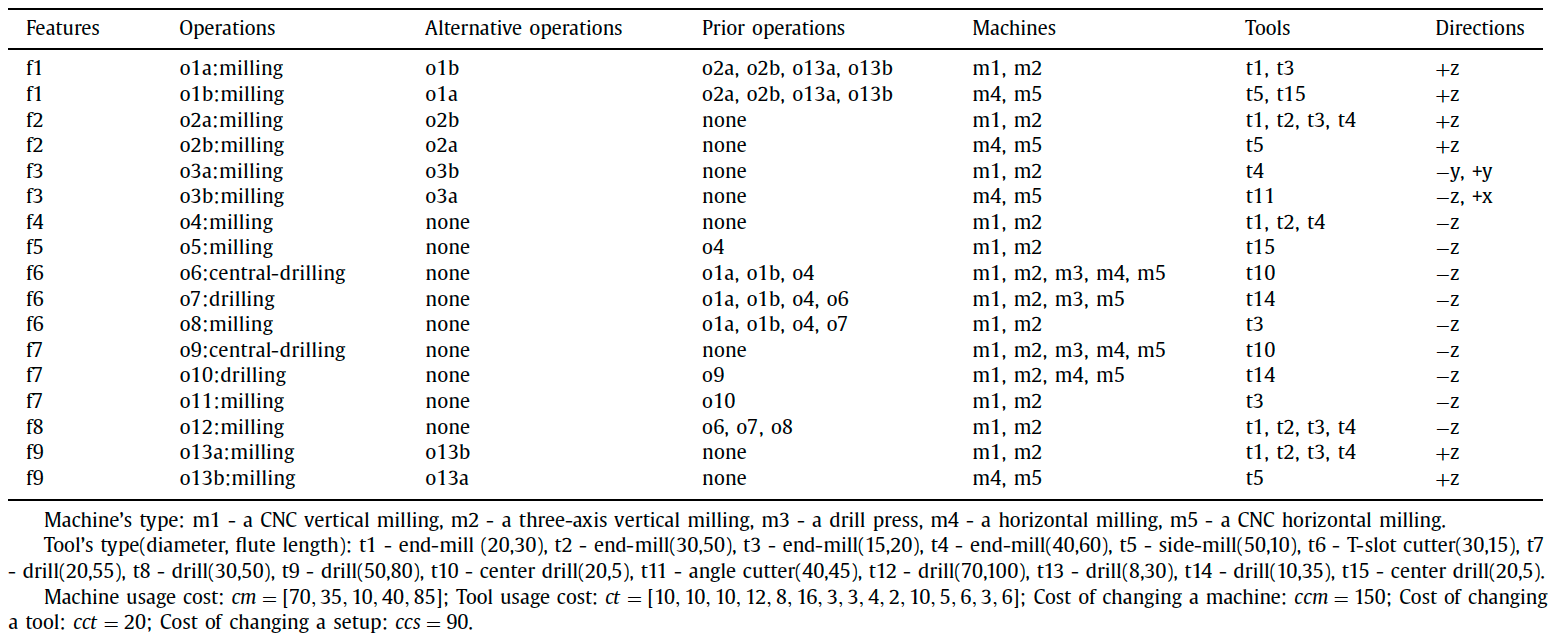

In [2]:
# Input the example
tcm = 140  # the time of changing a machine 
tct = 20  # the time of changing a tool
tcs = 120  # the time of changing a setup
s1 = Specification([], [], ['m2', 'm3', 'm4'], ['t6', 't7', 't8'], ['+x', '-x', '+y', '-y', '+z'], [20, 20, 15])
s2 = Specification([], ['o1'], ['m2', 'm3', 'm4'], ['t6', 't7', 't8'], ['+x', '-x', '+y', '-y', '-z'], [20, 20, 15])
s3 = Specification([], ['o1', 'o2'], ['m2', 'm3', 'm4'], ['t6', 't7', 't8'], ['+x', '-x', '+y', '-z'], [15, 15, 11.25])
s4 = Specification([], ['o1', 'o2'], ['m2', 'm3', 'm4'], ['t6', 't7', 't8'], ['+x', '-x', '+y', '+z'], [15, 11.25, 18])
s5 = Specification([], ['o1', 'o2'], ['m2', 'm3', 'm4'], ['t6', 't7', 't8'], ['+x', '-x', '-y', '-z'], [15, 15, 11.25])
s6 = Specification([], ['o1', 'o2'], ['m2', 'm3', 'm4'], ['t6', 't7', 't8'], ['+x', '-x', '-y', '+z'], [15, 15, 11.25])
s7 = Specification([], ['o1', 'o2', 'o9', 'o10', 'o11'], ['m2', 'm3', 'm4'], ['t7', 't8', 't11'], ['+x', '-x', '-z'], [15, 15, 11.25])
s8 = Specification([], ['o1', 'o2', 'o9', 'o10', 'o11'], ['m2', 'm3', 'm4'], ['t6', 't7', 't8', 't11'], ['+x', '-x', '-z'], [25, 25, 18.75])
s9 = Specification([], ['o1', 'o2'], ['m1', 'm2', 'm3', 'm4'], ['t2', 't3', 't4'], ['+z', '-z'], [30, 25, 25, 18.75])
s10 = Specification([], ['o1', 'o2', 'o9'], ['m2', 'm3', 'm4'], ['t9'], ['+z', '-z'], [20, 20, 15])
s11 = Specification([], ['o1', 'o2', 'o10'], ['m5'], ['t10'], ['+z', '-z'], [24])
s12 = Specification([], ['o1', 'o2', 'o3', 'o4', 'o5', 'o6'], ['m1', 'm2', 'm3', 'm4'], ['t1'], ['+y', '-y'], [9.6, 8, 8, 6])
s13 = Specification([], ['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o12'], ['m2', 'm3', 'm4'], ['t5'], ['+y', '-y'], [8, 8, 6])
s14 = Specification([], ['o1', 'o2', 'o3', 'o4', 'o5', 'o6'], ['m1', 'm2', 'm3', 'm4'], ['t2'], ['+z', '-z'], [6, 5, 5, 3.75])
specifications = {'o1': s1, 'o2': s2, 'o3': s3, 'o4': s4, 'o5': s5, 'o6': s6, 'o7': s7, 'o8': s8, 'o9': s9, 'o10': s10, 'o11': s11, 'o12': s12, 'o13': s13, 'o14': s14}

In [3]:
# Define parameters
operations = list(specifications.keys())
machines = ['m1', 'm2', 'm3', 'm4', 'm5']
tools = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11']
directions = ['+x', '-x', '+y', '-y', '+z', '-z']
no = len(operations)  # the number of operations
nm = len(machines)  # the number of machines
nt = len(tools)  # the number of tools
nd = len(directions)  # the number of directions 
n = no

In [4]:
# Index operations, machines, tools, and directions
o_ind = {}  # the index of operations
m_ind = {}  # the index of machines
t_ind = {}  # the index of tools
d_ind = {}  # the index of directions
for i in range(no):
    o_ind[operations[i]] = i
for i in range(nm):
    m_ind[machines[i]] = i
for i in range(nt):
    t_ind[tools[i]] = i
for i in range(len(directions)):
    d_ind[directions[i]] = i

In [5]:
# Define sets
import numpy as np
A = []  # A[i] is the set of alternatives of the ith operation
P = []  # the set of all possible precedence pairs
O = []  # O[i] is the set of possible successors of the ith operation
Q = []  # Q[i] is the set of possible immediate successors of the ith operation
M = []  # M[i] is the set of machines available for the ith operation 
T = []  # T[i] is the set of tools available for the ith operation
D = []  # D[i] is the set of toll access directions available for the ith operation
pt = np.zeros((no, nm, nt))  # pt[i, m, t] is the processing time of the ith operation on the mth machine using the tth tool
tt = np.zeros((nm, nm))  # tt[mi, mj] is the transportation time from machine mi to machine mj

for _ in range(no):
    A.append(set())
    O.append(set())
    Q.append(set())
    M.append(set())
    T.append(set())
    D.append(set())

for op in specifications.keys():
    op_ind = o_ind[op]
    for m in specifications[op].machine:
        mi = m_ind[m]
        M[op_ind].add(mi)
    for t in specifications[op].tool:
        ti = t_ind[t]
        T[op_ind].add(ti)
    for d in specifications[op].direction:
        di = d_ind[d]
        D[op_ind].add(di)
    for op2 in specifications[op].alternative:
        op2_ind = o_ind[op2]
        A[op_ind].add(op2_ind)
    for op2 in specifications[op].prior:
        op2_ind = o_ind[op2]
        P.append([op2_ind, op_ind])
    
# Calculate the possible successor set O and the possible immediate successor set Q
for op in specifications.keys():
    i = o_ind[op]
    temp_set = set([l for l in range(no)])
    temp_set = temp_set - {i} - set(A[i])
    for j in temp_set:
        if [j, i] in P:
            temp_set = temp_set - {j}
    O[i] = temp_set.copy()
    need_to_delete = set()
    for k in temp_set:
        if [i, k] in P:
            for j in temp_set:
                if [k, j] in P:
                    need_to_delete.add(j)
    temp_set = temp_set - need_to_delete
    Q[i] = temp_set.copy()
    
for operation in specifications.keys():
    operation_ind = o_ind[operation]
    for i in range(len(specifications[operation].machine)):
        machine = specifications[operation].machine[i]
        machine_ind = m_ind[machine]
        time = specifications[operation].time[i]
        for tool in specifications[operation].tool:
            tool_ind = t_ind[tool]
            pt[operation_ind, machine_ind, tool_ind] = time

for i in range(nm):
    for j in range(nm):
        if i != j:
            tt[i, j] = 140

In [18]:
# Create optimization model
from docplex.mp.model import Model
fpp_model = Model(name='FPP')

In [19]:
# Define decision variables
s = fpp_model.binary_var_list(no, name='s')
u = fpp_model.binary_var_matrix(no, no, name='u')
v = fpp_model.binary_var_matrix(no, no, name='v')
x = fpp_model.binary_var_matrix(no, nm, name='x')
y = fpp_model.binary_var_matrix(no, nt, name='y')
z = fpp_model.binary_var_matrix(no, nd, name='z')
beta = fpp_model.binary_var_list(no, name='beta')
gamma = fpp_model.binary_var_list(no, name='gamma')
xi = fpp_model.binary_var_cube(no, nm, nt, name='xi')
delta = fpp_model.binary_var_cube(no, nm, nm, name='delta')

In [20]:
# Define constraints
# Eq.(1)
eq1 = (s[i] + sum(s[j] for j in A[i]) == 1 for i in range(no))
c1 = fpp_model.add_constraints(eq1, names='eq1')

# Eq.(2)
eq2 = (sum(u[i, j] for j in range(no) if j not in Q[i]) == 0 for i in range(no))
c2 = fpp_model.add_constraints(eq2, names='eq2')

# Eq.(3)
eq3 = (sum(u[i, j] for j in range(no) if j in Q[i]) <= s[i] for i in range(no))
c3 = fpp_model.add_constraints(eq3, names='eq3')

# Eq.(4)
eq4 = (sum(u[i, j] for i in range(no)) <= s[j] for j in range(no))
c4 = fpp_model.add_constraints(eq4, names='eq4')

# Eq.(5)
eq5 = (sum(u[i, j] for i in range(no) for j in Q[i]) == n - 1)
c5 = fpp_model.add_constraint(eq5, ctname='eq5')

# Eq.(7)
eq7 = (sum(v[i, j] for j in range(no) if j not in O[i]) == 0 for i in range(no))
c7 = fpp_model.add_constraints(eq7, names='eq7')

# Eq.(8)
eq8 = (u[i, j] <= v[i, j] for i in range(no) for j in Q[i])
c8 = fpp_model.add_constraints(eq8, names='eq8')

# Eq.(9)
eq9 = (2 * (v[i, j] + v[j, i]) <= s[i] + s[j] for i in range(no) for j in range(i + 1, no))
c9 = fpp_model.add_constraints(eq9, names='eq9')

# Eq.(16)
eq16 = (v[i, j] + v[j, k] + v[k, i] >= s[i] + s[j] + s[k] - 2 for i in range(no) for j in range(no) for k in range(no) if (i > j > k) or (i < j < k))
c16 = fpp_model.add_constraints(eq16, names='eq16')

# Eq.(17)
eq17 = (sum(x[i, m] for m in M[i]) == s[i] for i in range(no))
c17 = fpp_model.add_constraints(eq17, names='eq17')

# Eq.(18)
eq18 = (sum(y[i, t] for t in T[i]) == s[i] for i in range(no))
c18 = fpp_model.add_constraints(eq18, names='eq18')

# Eq.(19)
eq19 = (sum(z[i, d] for d in D[i]) == s[i] for i in range(no))
c19 = fpp_model.add_constraints(eq19, names='eq19')

# Eq.(24)
eq24 = (u[i, j] + y[i, ti] + y[j, tj] <= 2 + beta[i] for i in range(no) for j in Q[i] for ti in T[i] for tj in T[j] if ti != tj)
c24 = fpp_model.add_constraints(eq24, names='eq24')

# Eq.(25)
eq25 = (u[i, j] + z[i, di] + z[j, dj] <= 2 + gamma[i] for i in range(no) for j in Q[i] for di in D[i] for dj in D[j] if di != dj)
c25 = fpp_model.add_constraints(eq25, names='eq25')

# Eq.(28)
eq28 = (x[i, m] + y[i, t] <= 1 + xi[i, m, t] for i in range(no) for m in M[i] for t in T[i])
c28 = fpp_model.add_constraints(eq28, names='eq28')

# Eq.(29)
eq29 = (u[i, j] + x[i, mi] + x[j, mj] <= 2 + delta[i, mi, mj] for i in range(no) for j in Q[i] for mi in M[i] for mj in M[j] if mi != mj)
c29 = fpp_model.add_constraints(eq29, names='eq29')

# Eq.(30)
eq30 = (sum(delta[i, mi, mj] for mi in M[i] for mj in range(nm) if mi != mj) <= beta[i] for i in range(no))
c30 = fpp_model.add_constraints(eq30, names='eq30')

# Eq.(31)
eq31 = (sum(delta[i, mi, mj] for mi in M[i] for mj in range(nm) if mi != mj) <= gamma[i] for i in range(no))
c31 = fpp_model.add_constraints(eq31, names='eq31')

In [21]:
# Define the objective function
obj = sum(pt[i, m, t] * xi[i, m, t] for i in range(no) for m in M[i] for t in T[i]) + sum(tt[mi, mj] * delta[i, mi, mj] for i in range(no) for mi in M[i] for mj in range(nm) if mi != mj) + sum(tct * beta[i] + tcs * gamma[i] for i in range(no))
fpp_model.set_objective('min', obj)                                                                                                                   

In [22]:
# Solve the model
sol = fpp_model.solve()
# fpp_model.print_information()
# fpp_model.print_solution()
# print(sol.solve_details)

In [23]:
# Print the result
import numpy as np
sol_v = sol.get_value_dict(v)
sol_x = sol.get_value_dict(x)
sol_y = sol.get_value_dict(y)
sol_z = sol.get_value_dict(z)
v = np.zeros((no, no))
for i in range(no):
    for j in range(no):
        v[i, j] = sol_v[(i, j)]
v_col = v.sum(axis=0)
v_row = v.sum(axis=1)
result = {}
for op_ind in range(len(v_col)):
    if v_col[op_ind] != 0 or v_row[op_ind] != 0:
        pos = int(v_col[op_ind])
        op = operations[op_ind]
        for m_ind in range(nm):
            if sol_x[(op_ind, m_ind)] != 0:
                m = machines[m_ind]
                break
        for t_ind in range(nt):
            if sol_y[(op_ind, t_ind)] != 0:
                t = tools[t_ind]
                break
        for d_ind in range(nd):
            if sol_z[(op_ind, d_ind)] != 0:
                d = directions[d_ind]
                break
        result[pos + 1] = [op, m, t, d]
result = dict(sorted(result.items(), key=lambda x: x[0]))
print(result)

{1: ['o1', 'm4', 't6', '-x'], 2: ['o2', 'm4', 't6', '-x'], 3: ['o4', 'm4', 't6', '-x'], 4: ['o3', 'm4', 't6', '-x'], 5: ['o6', 'm4', 't6', '-x'], 6: ['o5', 'm4', 't6', '-x'], 7: ['o9', 'm4', 't2', '+z'], 8: ['o14', 'm4', 't2', '+z'], 9: ['o10', 'm4', 't9', '+z'], 10: ['o11', 'm5', 't10', '-z'], 11: ['o12', 'm4', 't1', '+y'], 12: ['o13', 'm4', 't5', '+y'], 13: ['o7', 'm4', 't7', '+x'], 14: ['o8', 'm4', 't7', '+x']}


# Result

| Sequence  | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   | 13   | 14   |
| --------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Operation | o1   | o2   | o4   | o3   | o6   | o5   | o9   | o14  | o10  | o11  | o12  | o13  | o7   | o8   |
| Machine   | m4   | m4   | m4   | m4   | m4   | m4   | m4   | m4   | m4   | m5   | m4   | m4   | m4   | m4   |
| Tool      | t6   | t6   | t6   | t6   | t6   | t6   | t2   | t2   | t9   | t10  | t1   | t5   | t7   | t7   |
| Direction | -x   | -x   | -x   | -x   | -x   | -x   | +z   | +z   | +z   | -z   | +y   | +y   | +x   | +x   |

- number of variables: 1862
   - binary=1862, integer=0, continuous=0
- number of constraints: 3206
   - linear=3206
- objective value: 1062.250